In this notebook we plot the factorizable piece of Fmed, using the analytic formulas, both for non-eikonal and in the eikonal limit

In [1]:
from plot_functions import *

In [2]:
points = 30

t_vals = np.linspace(0.001,2,points)

lower_z = 0.001
upper_z = 0.5
log_oneover_z = np.linspace(np.log(1/lower_z),np.log(1/upper_z),points)
z_values = np.exp(-log_oneover_z)

# Use theta as proxy for p, as p ~ z*(1-z)*th*E
lower_th = 0.01
upper_th = 1.5
log_oneover_th = np.linspace(np.log(1/lower_th),np.log(1/upper_th),points)
theta_values = np.exp(-log_oneover_th)

# Lund planes

### Full

In [3]:
Z, TH = np.meshgrid(log_oneover_z,log_oneover_th)
Z_lin, TH_lin = np.meshgrid(z_values,theta_values)
lund = Fmed_diag(L,Z_lin,TH_lin)
lund_eik = Fmed_diag_eik(L,Z_lin,TH_lin)

<Figure size 3840x2880 with 0 Axes>

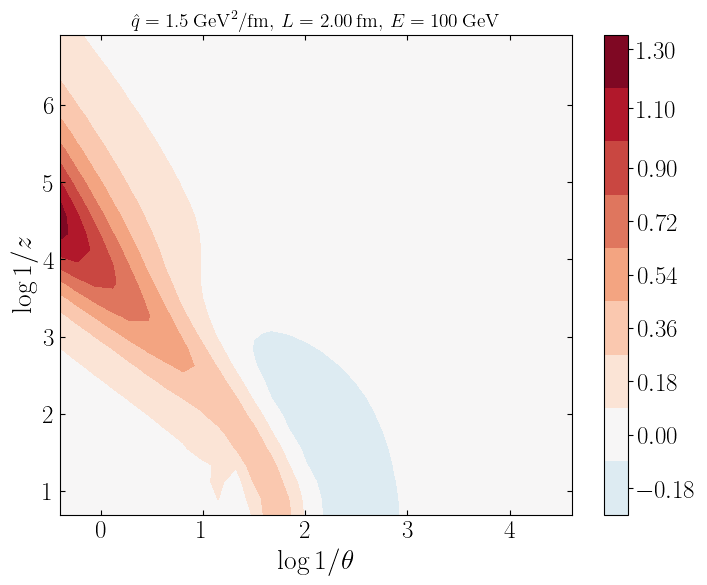

<Figure size 3840x2880 with 0 Axes>

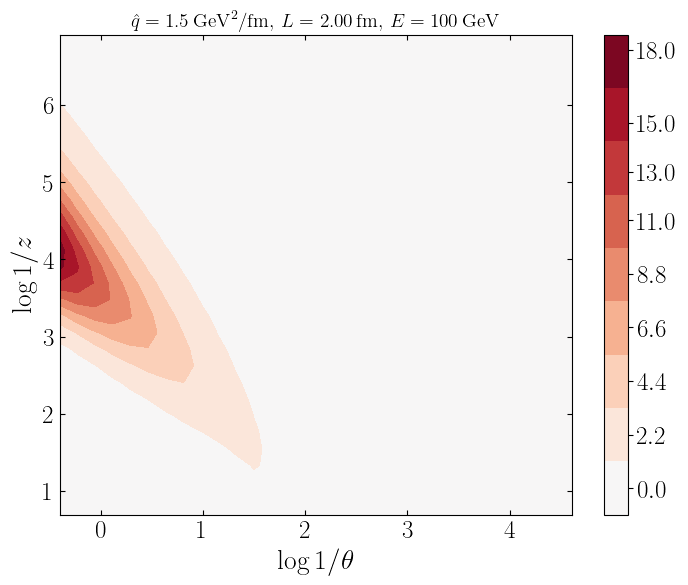

In [4]:
pl(lund,0,L,name='eikonal/Fmed',x=TH,y=Z)
pl(lund_eik,0,L,name='eikonal/Fmed_eik',x=TH,y=Z)

In [6]:
lund_eik_error = abs(lund-lund_eik)/(1+abs(lund))

<Figure size 3840x2880 with 0 Axes>

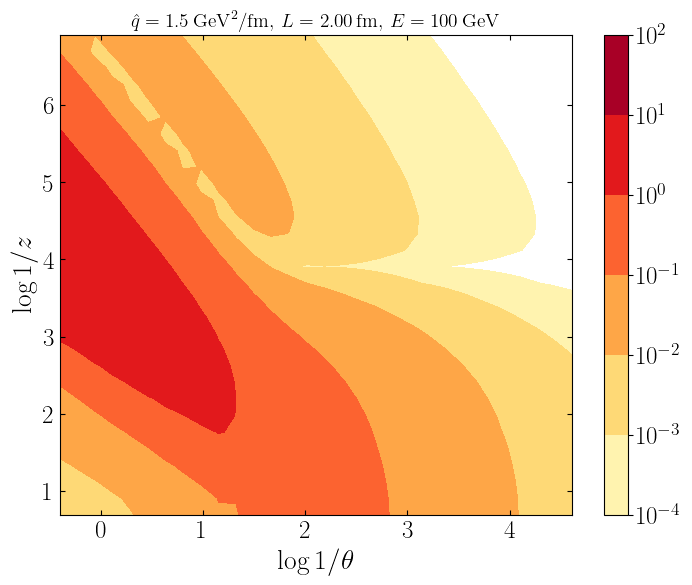

In [7]:
pl(lund_eik_error,0,L,name='eikonal/eik_error',x=TH,y=Z,log=True)

### In-in only

In [8]:
lund_inin = Fmed_inin(L,Z_lin,TH_lin)
lund_inin_eik = Fmed_inin_eik(L,Z_lin,TH_lin)

<Figure size 3840x2880 with 0 Axes>

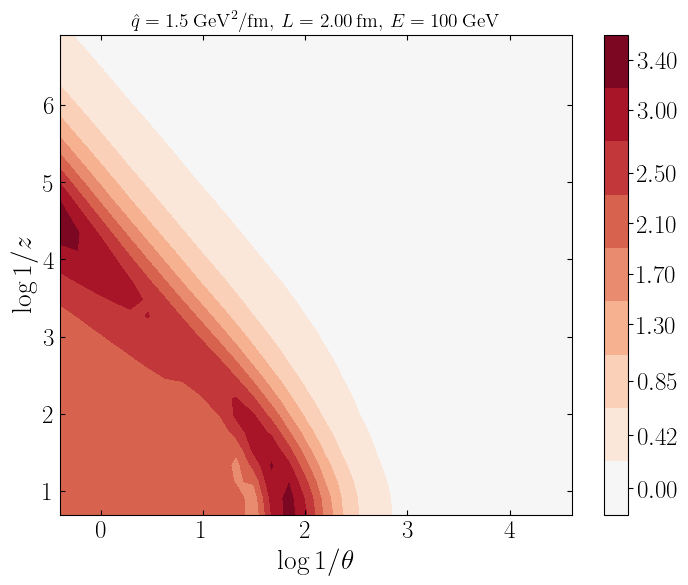

<Figure size 3840x2880 with 0 Axes>

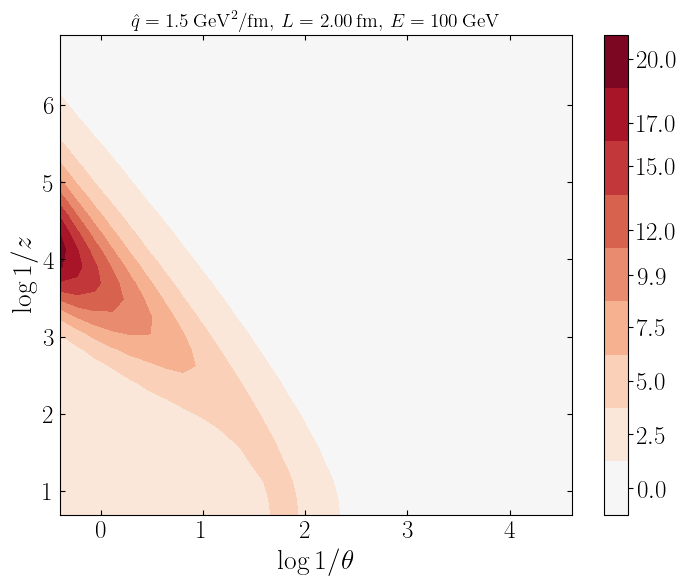

In [9]:
pl(lund_inin,0,L,name='eikonal/inin',x=TH,y=Z)
pl(lund_inin_eik,0,L,name='eikonal/inin_eik',x=TH,y=Z)

In [10]:
lund_inin_error = abs(lund_inin-lund_inin_eik)/(1+abs(lund_inin))

<Figure size 3840x2880 with 0 Axes>

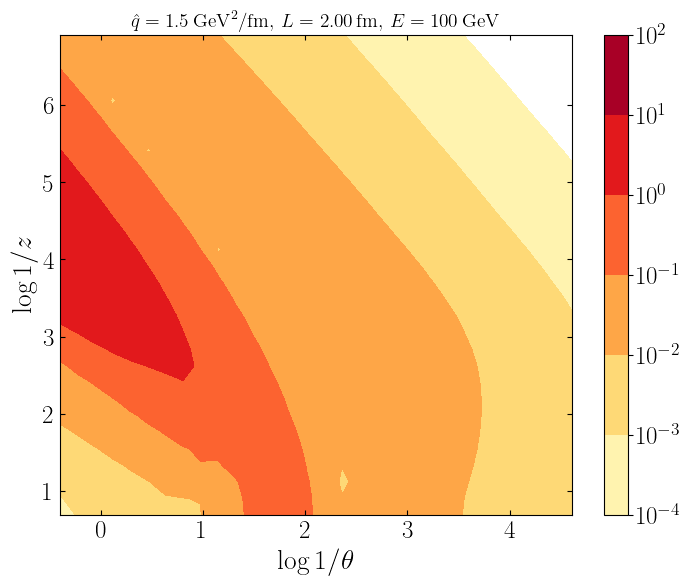

In [11]:
pl(lund_inin_error,0,L,name='eikonal/eik_error_inin',x=TH,y=Z,log=True)

# Function of time, z and theta

/Users/johannes/Library/CloudStorage/Dropbox/PhD/Code/schrodinger/plot_functions.py:105: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  re = quad(real_fas,0,L,args=(L,z,th))[0]


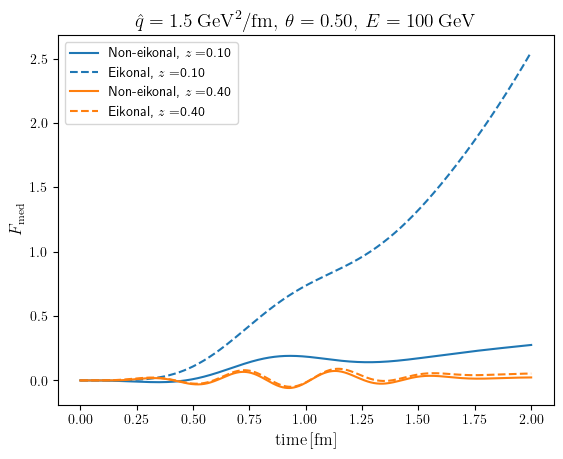

In [13]:
time_frac = 1
zs=[0.1,0.4]
theta = 0.5
colors = ['C0','C1']

#plt.figure(dpi=500) # 
plt.rcParams['text.usetex'] = True

for z ,col in zip(zs,colors):
    plt.plot(t,Fmed_diag(t,z,theta), label=r'Non-eikonal, $z=${:.2f}'.format(z),color = col)
    plt.plot(t,Fmed_diag_eik(t,z,theta), label=r'Eikonal, $z=${:.2f}'.format(z),color = col, linestyle = "--")


plt.xlabel(r'$\mathrm{time\,[fm]}$',fontsize =12)
plt.ylabel(r'$F_{\mathrm{med}}$',fontsize =12)

plt.title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, \theta = %.2f,\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,theta,EGev),fontsize=14)

plt.legend(loc="upper left")

#plt.savefig(f'plots/Fmed_time_{EGev}.png', bbox_inches='tight')

plt.show()

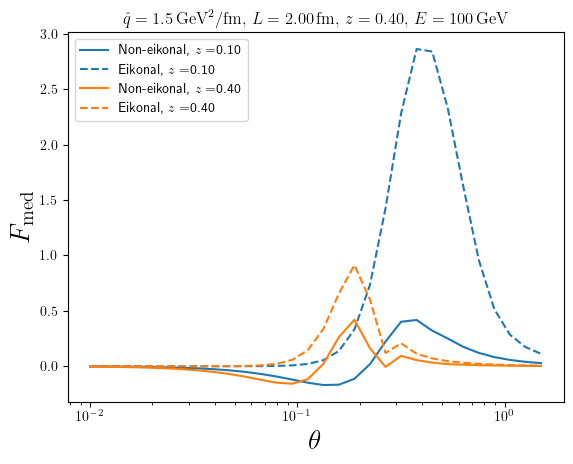

In [15]:
z_th = 3

time_frac = 1
zs=[0.1,0.4]
colors = ['C0','C1']


#plt.figure(dpi=500)
plt.rcParams['text.usetex'] = True

for z ,col in zip(zs,colors):
    
    plt.semilogx(theta_values,Fmed_diag(L,z,theta_values), label=r'Non-eikonal, $z=${:.2f}'.format(z),color = col)
    plt.semilogx(theta_values,Fmed_diag_eik(L,z,theta_values), label=r'Eikonal, $z=${:.2f}'.format(z),color = col, linestyle = "--")


plt.xlabel(r'$\theta$',fontsize =20)

plt.ylabel(r'$F_{\mathrm{med}}$',fontsize =20)
plt.title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, L = %.2f\,\mathrm{fm},\,z=%.2f,\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,L,z,EGev),fontsize=12)


plt.legend(loc="upper left")

#plt.savefig(f'plots/Fmed_theta_{EGev}.png', bbox_inches='tight')

plt.show()


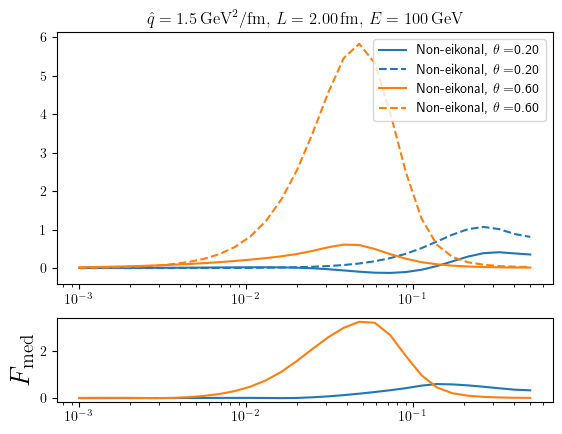

In [20]:

time_frac = 1
colors = ['C0','C1']

ths=[0.2,0.6]
#colors = ['C0']

#plt.figure(dpi=500)
fig, ((ax1), (ax2)) = subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]},dpi=100)

plt.rcParams['text.usetex'] = True


for th ,col in zip(ths,colors):
  
    ax1.semilogx(z_values,Fmed_diag(L,z_values,th), label=r'Non-eikonal, $\theta=${:.2f}'.format(th),color = col)
    ax1.semilogx(z_values,Fmed_diag_eik(L,z_values,th), label=r'Non-eikonal, $\theta=${:.2f}'.format(th),color = col, linestyle = "--")

    ax2.semilogx(z_values,error_cal(Fmed_diag(L,z_values,th),Fmed_diag_eik(L,z_values,th)))


#plt.ylim(-0.3,1)

ax1.set_xlabel(r'$z$',fontsize =20)

ax1.set_ylabel(r'$F_{\mathrm{med}}$',fontsize =20)
ax1.set_title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, L = %.2f\,\mathrm{fm},\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,L,EGev),fontsize=12)

ax1.legend(loc="upper right")

plt.savefig(f'plots/Fmed_z_{EGev}.png', bbox_inches='tight')


plt.show()

### In-in

/Users/johannes/Library/CloudStorage/Dropbox/PhD/Code/schrodinger/plot_functions.py:105: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  re = quad(real_fas,0,L,args=(L,z,th))[0]


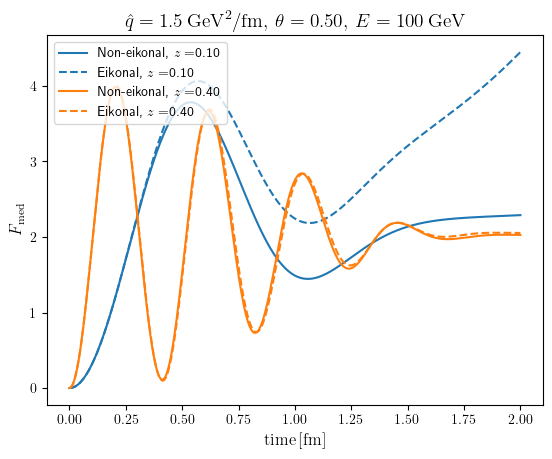

In [21]:
time_frac = 1
zs=[0.1,0.4]
theta = 0.5
colors = ['C0','C1']

#plt.figure(dpi=500) # 
plt.rcParams['text.usetex'] = True

for z ,col in zip(zs,colors):
    plt.plot(t,Fmed_inin(t,z,theta), label=r'Non-eikonal, $z=${:.2f}'.format(z),color = col)
    plt.plot(t,Fmed_inin_eik(t,z,theta), label=r'Eikonal, $z=${:.2f}'.format(z),color = col, linestyle = "--")


plt.xlabel(r'$\mathrm{time\,[fm]}$',fontsize =12)
plt.ylabel(r'$F_{\mathrm{med}}$',fontsize =12)

plt.title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, \theta = %.2f,\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,theta,EGev),fontsize=14)

plt.legend(loc="upper left")

#plt.savefig(f'plots/Fmed_time_{EGev}.png', bbox_inches='tight')

plt.show()

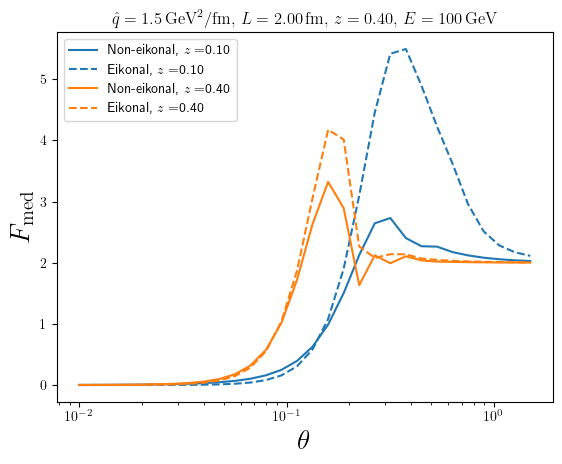

In [22]:
z_th = 3

time_frac = 1
zs=[0.1,0.4]
colors = ['C0','C1']


#plt.figure(dpi=500)
plt.rcParams['text.usetex'] = True

for z ,col in zip(zs,colors):
    
    plt.semilogx(theta_values,Fmed_inin(L,z,theta_values), label=r'Non-eikonal, $z=${:.2f}'.format(z),color = col)
    plt.semilogx(theta_values,Fmed_inin_eik(L,z,theta_values), label=r'Eikonal, $z=${:.2f}'.format(z),color = col, linestyle = "--")


plt.xlabel(r'$\theta$',fontsize =20)

plt.ylabel(r'$F_{\mathrm{med}}$',fontsize =20)
plt.title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, L = %.2f\,\mathrm{fm},\,z=%.2f,\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,L,z,EGev),fontsize=12)


plt.legend(loc="upper left")

#plt.savefig(f'plots/Fmed_theta_{EGev}.png', bbox_inches='tight')

plt.show()

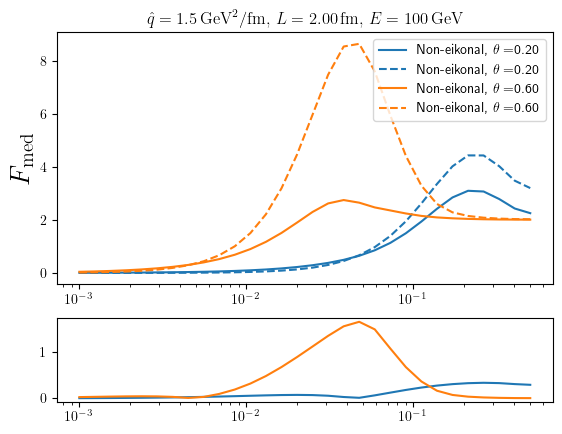

In [23]:

time_frac = 1
colors = ['C0','C1']

ths=[0.2,0.6]
#colors = ['C0']

#plt.figure(dpi=500)
fig, ((ax1), (ax2)) = subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]},dpi=100)

plt.rcParams['text.usetex'] = True


for th ,col in zip(ths,colors):
  
    ax1.semilogx(z_values,Fmed_inin(L,z_values,th), label=r'Non-eikonal, $\theta=${:.2f}'.format(th),color = col)
    ax1.semilogx(z_values,Fmed_inin_eik(L,z_values,th), label=r'Eikonal, $\theta=${:.2f}'.format(th),color = col, linestyle = "--")

    ax2.semilogx(z_values,error_cal(Fmed_inin(L,z_values,th),Fmed_inin_eik(L,z_values,th)))


#plt.ylim(-0.3,1)

ax1.set_xlabel(r'$z$',fontsize =20)

ax1.set_ylabel(r'$F_{\mathrm{med}}$',fontsize =20)
ax1.set_title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, L = %.2f\,\mathrm{fm},\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,L,EGev),fontsize=12)

ax1.legend(loc="upper right")

plt.savefig(f'plots/Fmed_z_{EGev}.png', bbox_inches='tight')


plt.show()

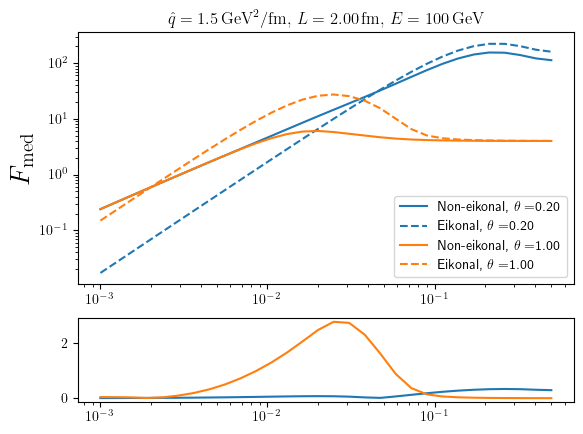

In [28]:

time_frac = 1
colors = ['C0','C1']

ths=[0.2,1]
#colors = ['C0']

#plt.figure(dpi=500)
fig, ((ax1), (ax2)) = subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]},dpi=100)

plt.rcParams['text.usetex'] = True


for th ,col in zip(ths,colors):
  
    ax1.loglog(z_values,2/th**2*Fmed_inin(L,z_values,th), label=r'Non-eikonal, $\theta=${:.2f}'.format(th),color = col)
    ax1.loglog(z_values,2/th**2*Fmed_inin_eik(L,z_values,th), label=r'Eikonal, $\theta=${:.2f}'.format(th),color = col, linestyle = "--")

    ax2.semilogx(z_values,error_cal(Fmed_inin(L,z_values,th),Fmed_inin_eik(L,z_values,th)))


#plt.ylim(-0.3,1)

ax1.set_xlabel(r'$z$',fontsize =20)

ax1.set_ylabel(r'$F_{\mathrm{med}}$',fontsize =20)
ax1.set_title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, L = %.2f\,\mathrm{fm},\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,L,EGev),fontsize=12)

ax1.legend(loc="lower right")

#plt.savefig(f'plots/Fmed_z_{EGev}.png', bbox_inches='tight')


plt.show()

In [32]:
print(2/th**2*Fmed_inin(L,0.5,th))
print(2/th**2*Fmed_inin_eik(L,.5,th))
print(2/th**2*Fmed_inout(L,0.5,th))
print(2/th**2*Fmed_inout_eik(L,.5,th))

4.009648028387998
4.01967988511658
-4.000000000003229
-3.999999770992227
